In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
diamonds = pd.read_csv('../Data/diamonds.csv', usecols = ['depth', 'table', 'price'],sep=',')
diamonds.head()
print(diamonds.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diamonds[['depth', 'table', 'price']], diamonds[['price']], test_size=0.1, random_state=0)

from sklearn import preprocessing
X_train_norm = preprocessing.normalize(X_train, axis=0)
X_test_norm = preprocessing.normalize(X_test, axis=0)

print('X_train_norm',len(X_train_norm))

from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters = 3, random_state = 0, n_init=3)
kmeans1.fit(X_train[['depth']])
labels1=kmeans1.predict(X_train[['depth']])

kmeans2 = KMeans(n_clusters = 3, random_state = 0, n_init=3)
kmeans2.fit(X_train[['table']])
labels2=kmeans2.predict(X_train[['table']])

dflabels1=pd.DataFrame(labels1, columns=['class1'])
dflabels2=pd.DataFrame(labels2, columns=['class2'])

(53940, 3)
X_train_norm 48546


<Axes: ylabel='price'>

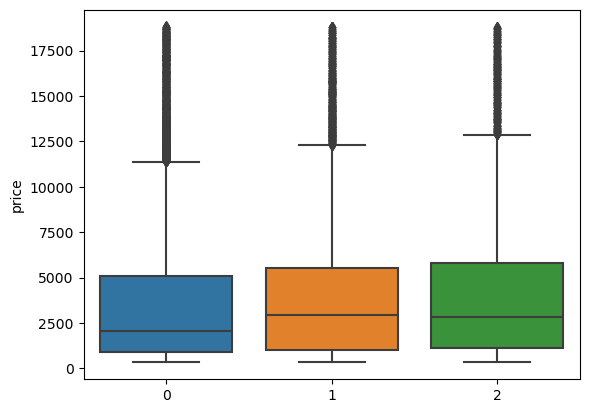

In [2]:
import seaborn as sns
sns.boxplot(x = labels1, y = y_train['price'])

<Axes: ylabel='price'>

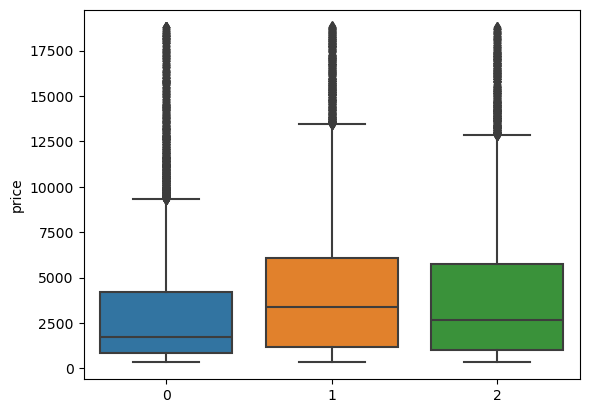

In [3]:
sns.boxplot(x = labels2, y = y_train['price'])

In [4]:
#X_train=pd.concat([train_sp, X_train.reset_index(drop=True, inplace=True)], axis=1)
df=pd.concat([X_train.reset_index(), dflabels1.reset_index(), dflabels2], axis=1)
df
#sns.scatterplot(data = df, x = 'class', y='Price')
#df[['Price','class']]
#sns.boxplot(x = df['class'], y = df['Price'])

,index,depth,table,price,index,class1,class2
0,37974,63.8,59.0,1007,0,1,1
1,45366,61.5,57.0,1665,1,0,2
2,34601,60.4,59.0,470,2,2,1
3,32113,62.3,53.0,783,3,0,0
4,22778,59.2,60.0,10800,4,2,1
...,...,...,...,...,...,...,...
48541,45891,60.7,59.0,1720,48541,0,1
48542,52416,63.6,60.0,2512,48542,1,1
48543,42613,61.3,58.0,505,48543,0,2
48544,43567,61.0,57.0,1431,48544,0,2


In [5]:
k=max(df['class1'])+1
print('depth')
for i in range(k):
    dfi=df['depth'][df['class1']==i]
    print(f'{i+1},  {dfi.mean():.1f}')
print('table')
for i in range(k):
    dfi=df['table'][df['class2']==i]
    print(f'{i+1},  {dfi.mean():.1f}')

depth
1,  61.6
2,  63.3
3,  59.5
table
1,  55.3
2,  60.2
3,  57.5


In [6]:
import numpy as np
#X_train
#df['class']
k=max(df['class1'])+1
print('Classes ij')
dfij_sorted=np.zeros(k*k)
t=0
for i in range(k):
    for j in range(k):
        dfij=df['price'][(df['class1']==i) & (df['class2']==j)]
        print(f'{i+1}{j+1},  {dfij.mean():.3f}')
        dfij_sorted[t]=dfij.mean()
        t+=1
dfij_sorted.sort()
print("dfij_sorted")
print([f'{dfij_sorted[t]:.1f}' for t in range(k*k)])

Classes ij
11,  3046.750
12,  4457.738
13,  4118.386
21,  3620.623
22,  4863.680
23,  4164.261
31,  3851.651
32,  4559.974
33,  4120.542
dfij_sorted
['3046.7', '3620.6', '3851.7', '4118.4', '4120.5', '4164.3', '4457.7', '4560.0', '4863.7']


In [7]:
max(df['class1'])

2